### 옷 분리
    
    최초 작성일 : 20/03/09
    작성자 : 양희승
    
    작성내용 : 무신사 이미지를 통해 옷 색깔 판별하기 위한 옷분리 코드
    
    
    수정내용 :
        전체 코드 수정
        
        20/03/20
            - 분리코드 수정
            - DB 적재 코드 추가
            - 옷 색 판별 코드 추가

In [38]:
import cv2 as cv
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
import sys
import os
import time
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

d:\users\yhs\appdata\local\programs\python\python36\lib\site-packages\tensorflow_core\python\client\session.py:1752: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [77]:
class fashion_tools(object):
    def __init__(self,imageid,version=1.1):
        self.imageid = imageid
#         self.model   = model
        self.model = load_model("Fashion-AI/model/topwears.h5")
        self.version = version
        
    def get_dress(self,stack=False):
        """limited to top wear and full body dresses (wild and studio working)"""
        """takes input rgb----> return PNG"""
        name =  self.imageid
        file = cv.imread(name)
        file = tf.image.resize_with_pad(file,target_height=512,target_width=512)
        rgb  = file.numpy()
        file = np.expand_dims(file,axis=0)/ 255.
        seq = self.model.predict(file)
        seq = seq[3][0,:,:,0]
        seq = np.expand_dims(seq,axis=-1)
        c1x = rgb*seq
        c2x = rgb*(1-seq)
        cfx = c1x+c2x
        dummy = np.ones((rgb.shape[0],rgb.shape[1],1))
        rgbx = np.concatenate((rgb,dummy*255),axis=-1)
        rgbs = np.concatenate((cfx,seq*255.),axis=-1)
        if stack:
            stacked = np.hstack((rgbx,rgbs))
            return stacked
        else:
            return rgbs[:,:,3]
        
        
    def get_patch(self):
        return None
    
    def development(self):
        n_ = '\n'
        return (f"VERSION : {self.version} {n_} Interesting tools to be added to the workflow pipe!!!")



In [62]:
# f = sys.argv[1]
# idx = int(sys.argv[1])
idx = int(input("숫자만 입력 : "))
files = os.listdir("Fashion-AI/input/")
f = "Fashion-AI/input/"+files[i]
o = "Fashion-AI/output/"+files[i].replace(".jpg", "")

숫자만 입력 : 1


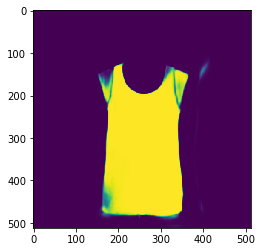

total time :  10.794538259506226 초


In [80]:
start_time = time.time()

for i in range(idx) :
    
#     f = "Fashion-AI/input/"+files[i]
    f = "Fashion-AI/input/100667.jpg"
#     test = cv.imread(f)
#     plt.imshow(test)
#     plt.show()
    o = "Fashion-AI/output/"+files[i].replace(".jpg", "")
    api    = fashion_tools(f)    
    image_ = api.get_dress(False)
#     img = cv.cvtColor(image_, cv.COLOR_)
    
    plt.imshow(image_)
    plt.show()
#     print("-----------------------------------------", str(i+1), "완료")
#     print("")

    cv.imwrite(o+"aa.png",image_)
#     cv.imwrite(o+".jpg", img)
    
end_time = time.time()
print("total time : ", end_time - start_time, "초")

(600, 500, 3)


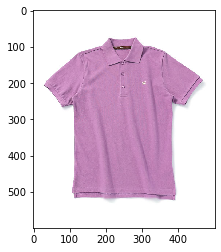

----------------------------------------- 0 완료

total time :  10.55115818977356 초


In [57]:





# img = cv.imread("Fashion-AI/input/100123.jpg")
# print(img.shape)
# plt.imshow(img)
# plt.show()
# # api    = fashion_tools(f)    
# # image_ = api.get_dress(False)
# # img = image_
# # img = cv.cvtColor(img, cv.COLOR_RGBA2RGB)
# # print(img)
# #     plt.imshow('', img)
# #     plt.show()
# #     plt.imshow('', img)
# #     plt.show()
# print("-----------------------------------------", str(i), "완료")
# print("")

# #     print(api.development())
# #     cv.imwrite(o+".png",image_)
    
# end_time = time.time()
# print("total time : ", end_time - start_time, "초")

In [5]:
# 배경색처리 - 8번 오류
# cv2.namedWindow(‘image’, cv2.WINDOW_NORMAL)

def kim(i) :
    file_name = str(i)
    img = cv.imread("img/clothes_test/"+file_name+".jpg")
    #Load the Image
    imgo = img
    height, width = imgo.shape[:2]

    #Create a mask holder
    mask = np.zeros(imgo.shape[:2],np.uint8)

    #Grab Cut the object
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    #Hard Coding the Rect… The object must lie within this rect.
    rect = (10,10,width-30,height-30)
    cv.grabCut(imgo,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
    mask = np.where((mask==2)|(mask==0),0,1).astype("uint8")
    img1 = imgo*mask[:,:,np.newaxis]

    #Get the background
    background = imgo-img1

    #Change all pixels in the background that are not black to white
    background[np.where((background > [0,0,0]).all(axis = 2))] = [255,255,255]

    #Add the background and the image
    final = background + img1

    #To be done – Smoothening the edges….

    # plt.imshow("image", final )
    cv.imwrite("img/clothes_test/ext_"+file_name+".jpg", final)
#     plt.imshow(final)
#     plt.show()

for i in range(31) :
    kim(i)